In [1]:
%load_ext autoreload
%autoreload 2
#%matplotlib widget
from matplotlib import pyplot as plt
from ipywidgets import interact, interactive, IntSlider, Layout, interact_manual, fixed
import ipywidgets as widgets
from IPython.display import display
import numpy as np
import pickle
from tqdm import tqdm
from trackers import *
from IPython.display import clear_output


# 0. Load data

In [2]:
import h5py

path = 'data/GT/'
f = h5py.File(path+'GT_TrackID.h5','r+') # Track file
track = f['image'][:]
f.close()

f = h5py.File(path+'Plantseg_T29-39.h5','r+') # PlantSeg file
plantseg = f['image'][:]
f.close()

# 1. Track on GT Fragments

In [4]:
cells_data, fragments = track_segmented(track)

t: 0
-i: 0 - 1188951178050807296
-i: 2 - 113470682337118208
-i: 10 - 741969267024475136
-i: 14 - 457405443866624
-i: 16 - 519779484839185920
-i: 19 - 555527657305937408
-i: 20 - 744502301338636288
-i: 24 - 6438851841097728
-i: 25 - 365003174345442816
-i: 26 - 731695481964465152
-i: 29 - 517985116287407104
-i: 32 - 338755607051896832
-i: 34 - 323275015929728000
-i: 39 - 415844411713259520
-i: 40 - 348114847642159616
-i: 42 - 406099268376464384
-i: 45 - 566469971366906880
-i: 47 - 336609875807179264
-i: 48 - 357227213503858688
-i: 49 - 521010920862780416
-i: 51 - 668504358423366144
-i: 52 - 480619270349269504
-i: 54 - 579769011233888256
-i: 55 - 16080950513370112
-i: 56 - 71451329693184
-i: 57 - 540959824202960896
-i: 58 - 370703317719845888
-i: 60 - 142266767245312
-i: 61 - 107065215287296
-i: 62 - 592083644605010944
-i: 67 - 459437874668899328
-i: 68 - 397619087506673664
-i: 70 - 405606317953125888
-i: 73 - 267260559416627200
-i: 75 - 396071086856342528
-i: 76 - 191755901988768256
-i: 

## 1.2. Generate tracks

In [9]:
tracks_data, track_pred, colors_id = gen_tracks(cells_data, fragments)

t: 0, f_i: 0, i: 1188951178050807296, origin: 1188951178050807296
t: 0, f_i: 2, i: 113470682337118208, origin: 113470682337118208
t: 0, f_i: 10, i: 741969267024475136, origin: 741969267024475136
t: 0, f_i: 14, i: 457405443866624, origin: 457405443866624
t: 0, f_i: 16, i: 519779484839185920, origin: 519779484839185920
t: 0, f_i: 19, i: 555527657305937408, origin: 555527657305937408
t: 0, f_i: 20, i: 744502301338636288, origin: 744502301338636288
t: 0, f_i: 24, i: 6438851841097728, origin: 6438851841097728
t: 0, f_i: 25, i: 365003174345442816, origin: 365003174345442816
t: 0, f_i: 26, i: 731695481964465152, origin: 731695481964465152
t: 0, f_i: 29, i: 517985116287407104, origin: 517985116287407104
t: 0, f_i: 32, i: 338755607051896832, origin: 338755607051896832
t: 0, f_i: 34, i: 323275015929728000, origin: 323275015929728000
t: 0, f_i: 39, i: 415844411713259520, origin: 415844411713259520
t: 0, f_i: 40, i: 348114847642159616, origin: 348114847642159616
t: 0, f_i: 42, i: 40609926837646438

### Pickle

In [11]:
pickle.dump({
    'fragments': fragments,
    'cells_data': cells_data,
    'tracks_data': tracks_data,
    'track_pred': track_pred,
    'colors_id': colors_id
}, open( '3_iou_tracking.pkl', 'wb' ) )

## 1.3. Visualize

In [89]:
data = pickle.load(open('3_iou_tracking.pkl', 'rb'))
fragments = data['fragments']
cells_data = data['cells_data']
tracks_data = data['tracks_data']
track_pred = data['track_pred']
colors_id = data['colors_id']

In [11]:
import napari

viewer = napari.Viewer()
viewer.add_image(plantseg, name='PlantSeg')
viewer.add_labels(track, name='GT Track Labels')
viewer.add_labels(track_pred, name='Pred Track Labels')

tracks = napari.layers.Tracks(tracks_data, 
                              name="Predicted Tracks")
viewer.add_layer(tracks)

<Tracks layer 'Predicted Tracks' at 0x2b0512bb0>

In [ ]:
show_labels = [22, 10, 54]
_, _, fragments_colored_sub, tracks_data_sub = extract_labels(show_labels, plantseg, plantseg, track_pred, tracks_data, colors_id)

import napari
viewer = napari.Viewer()
viewer.add_image(plantseg, name='Boundaries')
viewer.add_labels(fragments_colored_sub)
tracks = napari.layers.Tracks(tracks_data_sub, 
                              name="track_test")
viewer.add_layer(tracks)

## 1.4. Measure performance
https://autonomousvision.github.io/hota-metrics/

In [90]:
from trackeval_fatepredict import FatePredictDataset
fatepredict_eval = FatePredictDataset(track, track_pred)

0
1
2
3
4
5
6
7
8
9
10
0
1
2
3
4
5
6
7
8
9
10


In [91]:
from trackeval.metrics.hota import HOTA
hota = HOTA()
hota_metrics = hota.eval_sequence(fatepredict_eval.data)

In [93]:
hota_metrics

{'HOTA': array([0.95165136, 0.95165136, 0.95165136, 0.95165136, 0.95165136,
        0.95165136, 0.95165136, 0.95165136, 0.95165136, 0.95165136,
        0.95165136, 0.95165136, 0.95165136, 0.95165136, 0.95165136,
        0.95165136, 0.95165136, 0.95165136, 0.95165136]),
 'DetA': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1.]),
 'AssA': array([0.90564031, 0.90564031, 0.90564031, 0.90564031, 0.90564031,
        0.90564031, 0.90564031, 0.90564031, 0.90564031, 0.90564031,
        0.90564031, 0.90564031, 0.90564031, 0.90564031, 0.90564031,
        0.90564031, 0.90564031, 0.90564031, 0.90564031]),
 'DetRe': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1.]),
 'DetPr': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1.]),
 'AssRe': array([0.92794733, 0.92794733, 0.92794733, 0.92794733, 0.92794733,
        0.92794733, 0.92794733, 0.92794733, 0.92794733, 0.92794733,
       

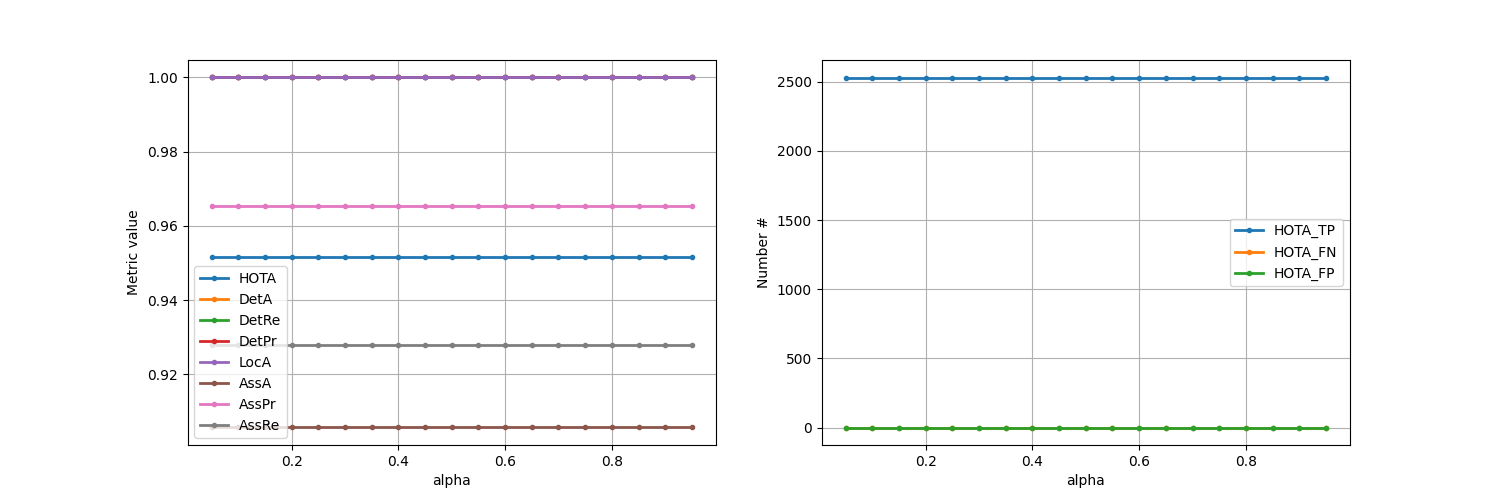

In [94]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15,5))

for m in ('HOTA', 'DetA', 'DetRe', 'DetPr', 'LocA', 'AssA', 'AssPr', 'AssRe'):
    ax1.plot(hota.array_labels, [s for s in hota_metrics[m]], '.-', lw=2, label=m)
	
ax1.set_xlabel(r'alpha')
ax1.set_ylabel('Metric value')
ax1.grid()
ax1.legend()

for m in ('HOTA_TP', 'HOTA_FN', 'HOTA_FP'):
    ax2.plot(hota.array_labels, [s for s in hota_metrics[m]], '.-', lw=2, label=m)
    
ax2.set_xlabel(r'alpha')
ax2.set_ylabel('Number #')
ax2.grid()
ax2.legend()
plt.savefig('3.1_hota_metrics_gt_iou_track.png')

# 2. Track on WaterZ Fragments

In [59]:
import waterz

predicted_fragments = []
max_t, *_ = plantseg.shape
for t in range(max_t):
    predicted_fragments.append(get_fragments(plantseg[t], 0.55))
    
predicted_fragments = np.array(predicted_fragments)

Re-using already compiled waterz version
Preparing segmentation volume...
counting regions and sizes...
creating region graph for 484 nodes
creating statistics provider
extracting region graph...
Region graph number of edges: 2159
merging until threshold 0.55
computing initial scores
merging until 0.55
min edge score 0.0129592
threshold exceeded
merged 285 edges
extracting segmentation
Re-using already compiled waterz version
Preparing segmentation volume...
counting regions and sizes...
creating region graph for 433 nodes
creating statistics provider
extracting region graph...
Region graph number of edges: 1895
merging until threshold 0.55
computing initial scores
merging until 0.55
min edge score 0.0478849
threshold exceeded
merged 249 edges
extracting segmentation
Re-using already compiled waterz version
Preparing segmentation volume...
counting regions and sizes...
creating region graph for 460 nodes
creating statistics provider
extracting region graph...
Region graph number of edg

In [60]:
cells_data2, fragments2 = track_segmented(predicted_fragments)

t: 0
-i: 1 - 246531122790400
-i: 2 - 896146257775432704
-i: 3 - 113470682337118208
-i: 4 - 347693150407497728
-i: 5 - 13406834907939328
-i: 7 - 176119433134080
-i: 11 - 642643930631900672
-i: 12 - 246445238124544
-i: 13 - 633499096711168
-i: 14 - 780953113182870528
-i: 15 - 457405443866624
-i: 16 - 522207206513315328
-i: 19 - 159561548390467072
-i: 20 - 581247433302873600
-i: 21 - 744502301338636288
-i: 24 - 717093967547599872
-i: 25 - 4503719964049408
-i: 26 - 205442115656746496
-i: 28 - 1935235042246656
-i: 30 - 517985116287407104
-i: 31 - 286577191829898752
-i: 32 - 9044084536640000
-i: 34 - 415844411713259520
-i: 35 - 322395406627507200
-i: 37 - 771945699378989568
-i: 38 - 1303058866766336
-i: 39 - 916494630256640
-i: 42 - 779053758553262592
-i: 44 - 1690396212068352
-i: 45 - 599715041247232
-i: 48 - 338369094411620864
-i: 49 - 357227213503858688
-i: 50 - 545041846999452672
-i: 52 - 668680280283810304
-i: 55 - 580261592443131904
-i: 56 - 16080950513370112
-i: 58 - 54095982420296089

## 2.2 Generate tracks

In [62]:
tracks_data2, track_pred2, colors_id2 = gen_tracks(cells_data2, fragments2)

t: 0, f_i: 1, i: 246531122790400, origin: 246531122790400
t: 0, f_i: 2, i: 896146257775432704, origin: 896146257775432704
t: 0, f_i: 3, i: 113470682337118208, origin: 113470682337118208
t: 0, f_i: 4, i: 347693150407497728, origin: 347693150407497728
t: 0, f_i: 5, i: 13406834907939328, origin: 13406834907939328
t: 0, f_i: 7, i: 176119433134080, origin: 176119433134080
t: 0, f_i: 11, i: 642643930631900672, origin: 642643930631900672
t: 0, f_i: 12, i: 246445238124544, origin: 246445238124544
t: 0, f_i: 13, i: 633499096711168, origin: 633499096711168
t: 0, f_i: 14, i: 780953113182870528, origin: 780953113182870528
t: 0, f_i: 15, i: 457405443866624, origin: 457405443866624
t: 0, f_i: 16, i: 522207206513315328, origin: 522207206513315328
t: 0, f_i: 19, i: 159561548390467072, origin: 159561548390467072
t: 0, f_i: 20, i: 581247433302873600, origin: 581247433302873600
t: 0, f_i: 21, i: 744502301338636288, origin: 744502301338636288
t: 0, f_i: 24, i: 717093967547599872, origin: 71709396754759987

### Pickle

In [63]:
pickle.dump({
    'fragments': fragments2,
    'cells_data': cells_data2,
    'tracks_data': tracks_data2,
    'track_pred': track_pred2,
    'colors_id': colors_id2
}, open( '3.2_iou_tracking.pkl', 'wb' ) )

## 2.3 Visualize

In [3]:
data2 = pickle.load(open('3.2_iou_tracking.pkl', 'rb'))
fragments2 = data2['fragments']
cells_data2 = data2['cells_data']
tracks_data2 = data2['tracks_data']
track_pred2 = data2['track_pred']
colors_id2 = data2['colors_id']

In [ ]:
path = 'data/GT/'
f = h5py.File(path+'GT_IoU_Tracked.h5','w+') # Track file
f.create_dataset('dataset_1', data=d1)
f.close()

In [72]:
import napari

viewer = napari.Viewer()
viewer.add_image(plantseg, name='PlantSeg')
viewer.add_labels(track, name='GT Track Labels')
viewer.add_labels(track_pred2, name='Pred Track Labels')
viewer.add_labels(predicted_fragments, name='Predicted Fragments')

tracks = napari.layers.Tracks(tracks_data2, 
                              name="Predicted Tracks")
viewer.add_layer(tracks)

<Tracks layer 'Predicted Tracks' at 0x2f5eeae20>

In [ ]:
show_labels = [34, 67, 19, 71]
_, _, track_pred2_sub, tracks_data2_sub = extract_labels(show_labels, plantseg, plantseg, track_pred2, tracks_data2, colors_id2)

import napari
viewer = napari.Viewer()
viewer.add_image(plantseg, name='Boundaries')
viewer.add_labels(track_pred2_sub)
tracks = napari.layers.Tracks(tracks_data2_sub, 
                              name="track_test")
viewer.add_layer(tracks)

In [21]:
t0 = track_pred2[0, 0:10, 50:150, 50:150]
t1 = track_pred2[1, 0:10, 50:150, 50:150]
p0 = plantseg[0, 0:10, 50:150, 50:150]
p1 = plantseg[1, 0:10, 50:150, 50:150]
t0_masks = [mask(t0, i) for i in np.unique(t0)]
t1_masks = [mask(t1, i) for i in np.unique(t1)]

t0_cells = [p0+t0_masks[a] for a,i in enumerate(np.unique(t0))]
t1_cells = [p1+t1_masks[a] for a,i in enumerate(np.unique(t1))]

def draw_cells(gt_c, pred_c, z):
    fig = plt.figure(figsize=(6, 3))
      
    # setting values to rows and column variables
    rows = 1
    columns = 2
    
    # Plot gt cell
    fig.add_subplot(rows, columns, 1)
    plt.imshow(t0_cells[gt_c][z], cmap='viridis')
    plt.axis('off')
    plt.title('t+0 Cell '+str(np.unique(t0)[gt_c]))

    # Plot segmented cell
    fig.add_subplot(rows, columns, 2)
    plt.imshow(t1_cells[pred_c][z], cmap='viridis')
    plt.axis('off')
    plt.title('t+1 Cell '+str(np.unique(t1)[pred_c]))

    c0 = np.array(regionprops(t0_masks[gt_c])[0].centroid)
    c1 = np.array(regionprops(t1_masks[pred_c])[0].centroid)
    dist = np.linalg.norm(c0-c1)
    
    print('Dice:',dice_coefficient(t0_masks[gt_c], t1_masks[pred_c]))
    print('IoU:',jaccard_coefficient(t0_masks[gt_c], t1_masks[pred_c]))
    print('Dist:',dist)

    plt.tight_layout()
    plt.savefig('iou_compare_cells.png')
    plt.show()

    return

%config InlineBackend.print_figure_kwargs = {'bbox_inches':None}

max_z, *_ = p0.shape
max_gt_c = len(np.unique(t0))-1
max_pred_c = len(np.unique(t1))-1
p=interactive(draw_cells, 
              gt_c=widgets.IntSlider(min=0, max=max_gt_c, step=1, continuous_update=True, value=0),
              pred_c=widgets.IntSlider(min=0, max=max_pred_c, step=1, continuous_update=True, value=0),
              z=widgets.IntSlider(min=0, max=max_z-1, step=1, continuous_update=True, value=0))
display(p)

interactive(children=(IntSlider(value=0, description='gt_c', max=30), IntSlider(value=0, description='pred_c',…

## 2.4 Measure performance
https://autonomousvision.github.io/hota-metrics/

In [92]:
from trackeval_fatepredict import FatePredictDataset
fatepredict_eval2 = FatePredictDataset(track, track_pred2)

In [93]:
from trackeval.metrics.hota import HOTA
hota2 = HOTA()
hota2_metrics = hota2.eval_sequence(fatepredict_eval2.data)

In [94]:
hota2_metrics.keys()

dict_keys(['HOTA', 'DetA', 'AssA', 'DetRe', 'DetPr', 'AssRe', 'AssPr', 'LocA', 'OWTA', 'HOTA_TP', 'HOTA_FN', 'HOTA_FP', 'HOTA(0)', 'LocA(0)', 'HOTALocA(0)'])

In [95]:
print(hota2.array_labels)
print(hota2_metrics)

[0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65 0.7
 0.75 0.8  0.85 0.9  0.95]
{'HOTA': array([0.67905076, 0.67731931, 0.67595822, 0.67537076, 0.67219552,
       0.67043267, 0.6690504 , 0.66443271, 0.66063091, 0.65668186,
       0.6492    , 0.64262406, 0.62926383, 0.6173255 , 0.6035396 ,
       0.58841741, 0.57462763, 0.54284021, 0.48719212]), 'DetA': array([0.5601491 , 0.55540541, 0.55225893, 0.55121294, 0.54704301,
       0.54393025, 0.54186202, 0.53620287, 0.53058511, 0.52399868,
       0.51397567, 0.50506702, 0.48900388, 0.47469571, 0.46205144,
       0.44643418, 0.43248289, 0.40365854, 0.34816984]), 'AssA': array([0.82319143, 0.82599385, 0.82736464, 0.82749448, 0.82598042,
       0.8263559 , 0.82609301, 0.82332799, 0.82255079, 0.82296212,
       0.82000114, 0.81764531, 0.80975425, 0.80281066, 0.78835388,
       0.77555677, 0.76349128, 0.73001181, 0.68172522]), 'DetRe': array([0.65310154, 0.64954563, 0.64717503, 0.64638483, 0.64322402,
       0.64085342, 0.6392730

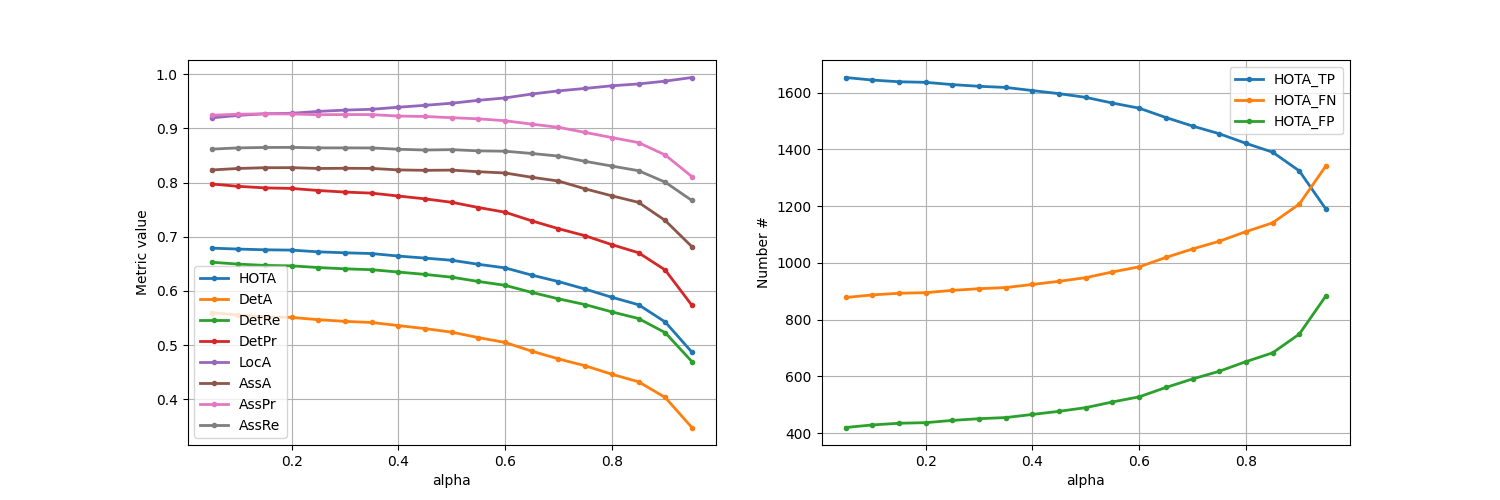

In [95]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15,5))

for m in ('HOTA', 'DetA', 'DetRe', 'DetPr', 'LocA', 'AssA', 'AssPr', 'AssRe'):
    ax1.plot(hota2.array_labels, [s for s in hota2_metrics[m]], '.-', lw=2, label=m)
	
ax1.set_xlabel(r'alpha')
ax1.set_ylabel('Metric value')
ax1.grid()
ax1.legend()

for m in ('HOTA_TP', 'HOTA_FN', 'HOTA_FP'):
    ax2.plot(hota2.array_labels, [s for s in hota2_metrics[m]], '.-', lw=2, label=m)
    
ax2.set_xlabel(r'alpha')
ax2.set_ylabel('Number #')
ax2.grid()
ax2.legend()
plt.savefig('3.2_hota_metrics_waterz_iou_track.png')

In [51]:
print('%.3f' % hota2_metrics['AssA'][9])
print('%.3f' % hota2_metrics['AssA'][17])
print('%.3f' % hota2_metrics['DetA'][9])
print('%.3f' % hota2_metrics['DetA'][17])
print('%.3f' % hota2_metrics['LocA'][9])
print('%.3f' % hota2_metrics['LocA'][17])
print('%.3f' % hota2_metrics['HOTA'][9])
print('%.3f' % hota2_metrics['HOTA'][17])
print('H@0.75: %.3f' % hota2_metrics['HOTA'][14])

0.823
0.730
0.524
0.404
0.946
0.987
0.657
0.543
H@0.75: 0.604


# 3. Track on StarDist fragments

In [ ]:
import sys
sys.path.append('../src/3DeeCellTracker')
sys.path.append('./src/3DeeCellTracker')

import stardistwrapper as sdw

## Load data

In [39]:
import h5py

path = 'data/GT/'
f = h5py.File(path+'GT_TrackID.h5','r+') # Track file
track = f['image'][:]
f.close()

f = h5py.File(path+'Plantseg_T29-39.h5','r+') # PlantSeg file
plantseg = f['image'][:]
f.close()

f = h5py.File(path+'C1mem_T29-39.h5','r+') # Raw file
c1 = f['image'][:]
f.close()

f = h5py.File(path+'C2ZO1_T29-39.h5','r+') # C2 file
c2 = f['image'][:]
f.close()

In [30]:
from csbdeep.utils import Path, normalize

stardist_X = []
for _t in range(max_t):
    _c1 = c1[_t]
    _c2 = c2[_t]
    _plantseg = plantseg[_t]

    _X = np.stack((_c1, _c2, _plantseg), axis=3) # StarDist requires the deepest axis to be the channels
    _X = normalize(_X, 1, 99.8, axis=(0,1))
    stardist_X.append(_X)

## Instance segmentation

In [24]:
model_name7="fatepredict_small_model7"
model7 = sdw.load_stardist_model(model_name=model_name7)

  0%|          | 0/43 [00:34<?, ?it/s]


Loading network weights from 'weights_best.h5'.
Couldn't load thresholds from 'thresholds.json', using default values. (Call 'optimize_thresholds' to change that.)
Using default values: prob_thresh=0.5, nms_thresh=0.4.
Load pretrained stardist model 'fatepredict_small_model7' from folder 'stardist_models'


In [ ]:
max_t, *_ = plantseg.shape
predicted_fragments3 = [model7.predict_instances(stardist_X[t], show_tile_progress=False)[0][0]
              for t in tqdm(range(max_t))]
predicted_fragments3 = np.array(predicted_fragments3)

  0%|          | 0/11 [00:00<?, ?it/s]

1/1 [==============================] - 0s 45ms/step


  9%|▉         | 1/11 [08:01<1:20:19, 481.90s/it]

1/1 [==============================] - 0s 44ms/step


 18%|█▊        | 2/11 [15:39<1:10:09, 467.67s/it]

1/1 [==============================] - 0s 45ms/step


 27%|██▋       | 3/11 [24:16<1:05:19, 489.94s/it]

1/1 [==============================] - 0s 38ms/step


 36%|███▋      | 4/11 [33:01<58:48, 504.03s/it]  

1/1 [==============================] - 0s 44ms/step


 45%|████▌     | 5/11 [41:55<51:28, 514.72s/it]

1/1 [==============================] - 0s 45ms/step


 55%|█████▍    | 6/11 [50:40<43:12, 518.41s/it]

1/1 [==============================] - 0s 36ms/step


 64%|██████▎   | 7/11 [59:24<34:40, 520.02s/it]

1/1 [==============================] - 0s 37ms/step


 73%|███████▎  | 8/11 [1:08:34<26:28, 529.60s/it]

1/1 [==============================] - 0s 50ms/step


 82%|████████▏ | 9/11 [1:18:40<18:27, 553.55s/it]

1/1 [==============================] - 0s 37ms/step


100%|██████████| 11/11 [1:36:01<00:00, 523.79s/it]


In [41]:
# Pickle predictions
import pickle
pickle.dump(predicted_fragments3, open( 'predicted_fragments_stardist.pkl', 'wb' ) )

## Track

In [40]:
predicted_fragments3 = pickle.load(open('3.3_predicted_fragments_stardist.pkl', 'rb'))

In [43]:
cells_data3, fragments3 = track_segmented(predicted_fragments3)

t: 0
t: 1


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 147/147 [01:48<00:00,  1.35it/s]


- already matched: 0.08833891896536905 (63) - 0.4546487100438098 (8)
- already matched: 0.5387386162838113 (72) - 0.056673511293634515 (52)
- already matched: 0.1606468560170744 (82) - 0.16248678048043508 (58)
- already matched: 0.2527058823529412 (115) - 0.21941620203345358 (62)
- already matched: 0.09781566329248803 (116) - 0.6432793875375521 (36)
- already matched: 0.07062955254942771 (124) - 0.48596000414464824 (85)
- already matched: 0.24357891179452518 (125) - 0.16248678048043508 (58)
- already matched: 0.10118483412322277 (133) - 0.23686594202898548 (126)
t: 2


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 145/145 [01:45<00:00,  1.38it/s]


- already matched: 0.363048747643415 (124) - 0.19973091976516633 (106)
- already matched: 0.056780227120908466 (133) - 0.552905054322154 (17)
- already matched: 0.07243278796349584 (140) - 0.6643247462919595 (28)
t: 3


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 142/142 [01:46<00:00,  1.34it/s]


- already matched: 0.551794024921183 (52) - 0.12518946376633489 (32)
- already matched: 0.2468677494199536 (117) - 0.40626541687222495 (105)
- already matched: 0.10247046186895814 (128) - 0.40400566457616827 (81)
- already matched: 0.06278935185185186 (133) - 0.5965383467621606 (83)
t: 4


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 148/148 [01:58<00:00,  1.25it/s]


- already matched: 0.4004080991994977 (98) - 0.16791188973335047 (82)
- already matched: 0.2698111883203481 (114) - 0.07000695894224074 (106)
- already matched: 0.22055086899075105 (141) - 0.3585564610011641 (103)
t: 5


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 145/145 [01:52<00:00,  1.29it/s]


- already matched: 0.13559322033898302 (100) - 0.39221236711329177 (81)
- already matched: 0.17210863594751302 (125) - 0.21741741741741738 (112)
- already matched: 0.22655663915978996 (128) - 0.23188542353717134 (84)
- already matched: 0.265712405396512 (132) - 0.23708403470154082 (110)
- already matched: 0.16219809439397292 (137) - 0.1507215392838055 (135)
t: 6


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 154/154 [01:50<00:00,  1.39it/s]


- already matched: 0.6339184597961495 (128) - 0.05797209579944784 (114)
- already matched: 0.1056280888102088 (130) - 0.5683605210656026 (56)
- already matched: 0.0724740656529771 (142) - 0.45124384727949984 (55)
- already matched: 0.06637984019668097 (146) - 0.37993596584845246 (73)
- already matched: 0.13763331640426613 (151) - 0.0525420846794763 (121)
- already matched: 0.08670520231213874 (153) - 0.16978887897710382 (118)
t: 7


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 145/145 [01:48<00:00,  1.34it/s]


- already matched: 0.12958480729845467 (103) - 0.517351098737198 (34)
- already matched: 0.1345762180792731 (115) - 0.3962707878380648 (82)
- already matched: 0.12072493422975739 (144) - 0.4847161572052402 (94)
t: 8


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 151/151 [01:50<00:00,  1.36it/s]


- already matched: 0.06273330568228952 (111) - 0.36850355721692996 (84)
- already matched: 0.22387687188019967 (120) - 0.3507602027207255 (67)
- already matched: 0.08172839506172835 (126) - 0.47716676964556537 (60)
- already matched: 0.05304857044436795 (127) - 0.569925146372193 (41)
- already matched: 0.2872621897442359 (139) - 0.36850355721692996 (84)
- already matched: 0.12422170052056747 (142) - 0.4253237678188764 (93)
t: 9


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 148/148 [01:53<00:00,  1.31it/s]


- already matched: 0.4303457536085935 (79) - 0.06994384789675889 (72)
- already matched: 0.07398834703487911 (120) - 0.48237899811087226 (29)
- already matched: 0.08910891089108908 (126) - 0.30263038958691135 (67)
- already matched: 0.22442528735632183 (129) - 0.27924114142364376 (81)
- already matched: 0.057120161756210264 (134) - 0.6617857443406547 (3)
t: 10


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 153/153 [01:59<00:00,  1.29it/s]

- already matched: 0.10446009389671362 (130) - 0.4204915273257771 (44)
- already matched: 0.09939427312775329 (134) - 0.2272583701831965 (121)
- already matched: 0.1412608053974278 (135) - 0.31006160164271046 (112)
- already matched: 0.05081119629167408 (143) - 0.3623833757421544 (136)
- already matched: 0.0521599264705882 (146) - 0.5142547356336501 (16)
- already matched: 0.13755325623858794 (152) - 0.2682926829268293 (50)


### Gen tracks

In [44]:
tracks_data3, track_pred3, colors_id3 = gen_tracks(cells_data3, fragments3)

### Pickle

In [45]:
pickle.dump({
    'fragments': fragments3,
    'cells_data': cells_data3,
    'tracks_data': tracks_data3,
    'track_pred': track_pred3,
    'colors_id': colors_id3
}, open( '3.3_iou_tracking_stardist.pkl', 'wb' ) )

## Visualize

In [86]:
data = pickle.load(open('3.3_iou_tracking_stardist.pkl', 'rb'))
fragments3 = data['fragments']
cells_data3 = data['cells_data']
tracks_data3 = data['tracks_data']
track_pred3 = data['track_pred']
colors_id3 = data['colors_id']

In [56]:
import napari

viewer = napari.Viewer()
#viewer.add_image(plantseg, name='PlantSeg')
#viewer.add_labels(predicted_fragments3, name='StarDist Fragments')
#viewer.add_labels(track, name='GT Track Labels')
viewer.add_labels(track_pred3, name='Pred Track Labels')

tracks = napari.layers.Tracks(tracks_data3, 
                              name="Predicted Tracks")
viewer.add_layer(tracks)

<Tracks layer 'Predicted Tracks' at 0x317eb3070>

In [57]:
show_labels = [21,7, 77, 24]
_, _, track_pred3_sub, tracks_data3_sub = extract_labels(show_labels, plantseg, plantseg, track_pred3, tracks_data3, colors_id3)

import napari
viewer = napari.Viewer()
viewer.add_image(plantseg, name='Boundaries')
viewer.add_labels(track_pred3_sub)
tracks = napari.layers.Tracks(tracks_data3_sub, 
                              name="track_test")
viewer.add_layer(tracks)

<Tracks layer 'track_test' at 0x340d47790>

2023-12-05 15:56:11.140 python3.8[89643:13623531] +[CATransaction synchronize] called within transaction
2023-12-05 15:56:29.232 python3.8[89643:13623531] +[CATransaction synchronize] called within transaction


## Measure performance

In [46]:
from trackeval_fatepredict import FatePredictDataset
fatepredict_eval3 = FatePredictDataset(track, track_pred3)

In [47]:
from trackeval.metrics.hota import HOTA
hota3 = HOTA()
hota3_metrics = hota3.eval_sequence(fatepredict_eval3.data)

In [48]:
print(hota3.array_labels)
print(hota3_metrics)

[0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65 0.7
 0.75 0.8  0.85 0.9  0.95]
{'HOTA': array([0.68131232, 0.68067529, 0.67971796, 0.67904818, 0.67305926,
       0.66611998, 0.66147688, 0.65514946, 0.64875054, 0.63119933,
       0.61625439, 0.59020177, 0.5496744 , 0.45875793, 0.31831196,
       0.1290284 , 0.01762455, 0.        , 0.        ]), 'DetA': array([0.52438577, 0.5232686 , 0.5215959 , 0.52048281, 0.51549398,
       0.5099891 , 0.50561391, 0.49855804, 0.49049839, 0.47098372,
       0.45502275, 0.4280316 , 0.38890745, 0.31301327, 0.19385411,
       0.05695398, 0.00313707, 0.        , 0.        ]), 'AssA': array([0.88520038, 0.88543217, 0.88577479, 0.88592057, 0.87878575,
       0.87004963, 0.86538692, 0.86092447, 0.85806044, 0.84591586,
       0.83461645, 0.81381405, 0.77689935, 0.67236397, 0.522674  ,
       0.29231195, 0.09901758, 0.        , 0.        ]), 'DetRe': array([0.56499407, 0.56420387, 0.56301857, 0.56222837, 0.55867246,
       0.55472145, 0.5515606

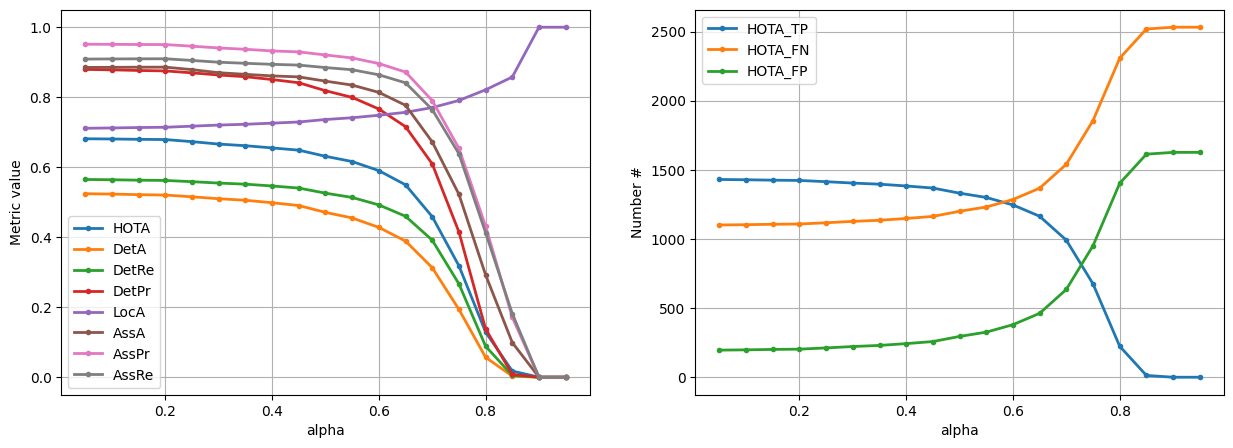

In [49]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15,5))

for m in ('HOTA', 'DetA', 'DetRe', 'DetPr', 'LocA', 'AssA', 'AssPr', 'AssRe'):
    ax1.plot(hota3.array_labels, [s for s in hota3_metrics[m]], '.-', lw=2, label=m)
	
ax1.set_xlabel(r'alpha')
ax1.set_ylabel('Metric value')
ax1.grid()
ax1.legend()

for m in ('HOTA_TP', 'HOTA_FN', 'HOTA_FP'):
    ax2.plot(hota3.array_labels, [s for s in hota3_metrics[m]], '.-', lw=2, label=m)
    
ax2.set_xlabel(r'alpha')
ax2.set_ylabel('Number #')
ax2.grid()
ax2.legend()
plt.savefig('3.3_hota_metrics_stardist_iou_track.png')

In [52]:
print('%.3f' % hota3_metrics['AssA'][9])
print('%.3f' % hota3_metrics['AssA'][17])
print('%.3f' % hota3_metrics['DetA'][9])
print('%.3f' % hota3_metrics['DetA'][17])
print('%.3f' % hota3_metrics['LocA'][9])
print('%.3f' % hota3_metrics['LocA'][17])
print('%.3f' % hota3_metrics['HOTA'][9])
print('%.3f' % hota3_metrics['HOTA'][17])
print('H@0.75: %.3f' % hota3_metrics['HOTA'][14])

0.846
0.000
0.471
0.000
0.736
1.000
0.631
0.000
H@0.75: 0.318


# 4. Hungarian on WaterZ

In [ ]:
import waterz

predicted_fragments = []
max_t, *_ = plantseg.shape
for t in range(max_t):
    predicted_fragments.append(get_fragments(plantseg[t], 0.55))
    clear_output(wait=True)

predicted_fragments = np.array(predicted_fragments)

In [59]:
cells_data4, fragments4 = track_segmented_hung(predicted_fragments)

t: 0 / 11
t: 1 / 11


100%|█████████████████████████████████████████| 198/198 [03:28<00:00,  1.05s/it]


t: 2 / 11


100%|█████████████████████████████████████████| 183/183 [02:49<00:00,  1.08it/s]


t: 3 / 11


100%|█████████████████████████████████████████| 192/192 [02:53<00:00,  1.11it/s]


t: 4 / 11


100%|█████████████████████████████████████████| 188/188 [03:12<00:00,  1.02s/it]


t: 5 / 11


100%|█████████████████████████████████████████| 184/184 [02:52<00:00,  1.07it/s]


t: 6 / 11


100%|█████████████████████████████████████████| 160/160 [02:50<00:00,  1.06s/it]


t: 7 / 11


100%|█████████████████████████████████████████| 193/193 [03:57<00:00,  1.23s/it]


t: 8 / 11


100%|█████████████████████████████████████████| 185/185 [03:28<00:00,  1.13s/it]


t: 9 / 11


100%|█████████████████████████████████████████| 187/187 [04:44<00:00,  1.52s/it]


t: 10 / 11


100%|█████████████████████████████████████████| 211/211 [04:01<00:00,  1.14s/it]


In [62]:
tracks_data4, track_pred4, colors_id4 = gen_tracks(cells_data4, fragments4)

In [63]:
m4, h4 = evaluate_hota(track, track_pred4)

In [64]:
m4

{'HOTA': array([0.62898704, 0.62732331, 0.6264298 , 0.62608225, 0.62362305,
        0.6225133 , 0.62140867, 0.61696059, 0.61465277, 0.61096785,
        0.60361223, 0.59731701, 0.58466587, 0.57383951, 0.55979775,
        0.54469903, 0.53191706, 0.50069057, 0.44480308]),
 'DetA': array([0.56067797, 0.55540541, 0.55225893, 0.55121294, 0.54704301,
        0.54444817, 0.54186202, 0.53569046, 0.53109411, 0.52500828,
        0.51397567, 0.50506702, 0.48900388, 0.47469571, 0.46205144,
        0.44643418, 0.43248289, 0.40365854, 0.34816984]),
 'AssA': array([0.70561841, 0.70855366, 0.71056215, 0.71112079, 0.71092346,
        0.71177172, 0.71263295, 0.71056028, 0.71135796, 0.71100156,
        0.70888128, 0.70641637, 0.69904186, 0.69369025, 0.67822214,
        0.66459299, 0.65421261, 0.6210473 , 0.56825652]),
 'DetRe': array([0.65349664, 0.64954563, 0.64717503, 0.64638483, 0.64322402,
        0.64124852, 0.63927301, 0.63453181, 0.6309759 , 0.62623469,
        0.61754247, 0.61043066, 0.59739234, 0

In [84]:
print('%.3f' % m4['AssA'][9])
print('%.3f' % m4['AssA'][17])
print('%.3f' % m4['DetA'][9])
print('%.3f' % m4['DetA'][17])
print('%.3f' % m4['LocA'][9])
print('%.3f' % m4['LocA'][17])
print('%.3f' % m4['HOTA'][9])
print('%.3f' % m4['HOTA'][17])
print('H@0.75: %.3f' % m4['HOTA'][14])

0.711
0.621
0.525
0.404
0.946
0.987
0.611
0.501
H@0.75: 0.560


# 5. Hungarian on GT

In [65]:
cells_data5, fragments5 = track_segmented_hung(track)

t: 0 / 11
t: 1 / 11


100%|█████████████████████████████████████████| 221/221 [07:46<00:00,  2.11s/it]


t: 2 / 11


100%|█████████████████████████████████████████| 242/242 [04:45<00:00,  1.18s/it]


t: 3 / 11


100%|█████████████████████████████████████████| 223/223 [04:15<00:00,  1.14s/it]


t: 4 / 11


100%|█████████████████████████████████████████| 217/217 [04:20<00:00,  1.20s/it]


t: 5 / 11


100%|█████████████████████████████████████████| 235/235 [04:01<00:00,  1.03s/it]


t: 6 / 11


100%|█████████████████████████████████████████| 205/205 [05:25<00:00,  1.59s/it]


t: 7 / 11


100%|█████████████████████████████████████████| 263/263 [06:01<00:00,  1.37s/it]


t: 8 / 11


100%|█████████████████████████████████████████| 259/259 [03:54<00:00,  1.11it/s]


t: 9 / 11


100%|█████████████████████████████████████████| 188/188 [03:53<00:00,  1.24s/it]


t: 10 / 11


100%|█████████████████████████████████████████| 253/253 [04:59<00:00,  1.18s/it]


In [66]:
tracks_data5, track_pred5, colors_id5 = gen_tracks(cells_data5, fragments5)

In [67]:
m5, h5 = evaluate_hota(track, track_pred5)

In [68]:
m5

{'HOTA': array([0.79165203, 0.79165203, 0.79165203, 0.79165203, 0.79165203,
        0.79165203, 0.79165203, 0.79165203, 0.79165203, 0.79165203,
        0.79165203, 0.79165203, 0.79165203, 0.79165203, 0.79165203,
        0.79165203, 0.79165203, 0.79165203, 0.79165203]),
 'DetA': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1.]),
 'AssA': array([0.62671293, 0.62671293, 0.62671293, 0.62671293, 0.62671293,
        0.62671293, 0.62671293, 0.62671293, 0.62671293, 0.62671293,
        0.62671293, 0.62671293, 0.62671293, 0.62671293, 0.62671293,
        0.62671293, 0.62671293, 0.62671293, 0.62671293]),
 'DetRe': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1.]),
 'DetPr': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1.]),
 'AssRe': array([0.94237464, 0.94237464, 0.94237464, 0.94237464, 0.94237464,
        0.94237464, 0.94237464, 0.94237464, 0.94237464, 0.94237464,
       

In [82]:
print('%.3f' % m5['AssA'][9])
print('%.3f' % m5['AssA'][17])
print('%.3f' % m5['DetA'][9])
print('%.3f' % m5['DetA'][17])
print('%.3f' % m5['LocA'][9])
print('%.3f' % m5['LocA'][17])
print('%.3f' % m5['HOTA'][9])
print('%.3f' % m5['HOTA'][17])

print('H@0.75: %.3f' % m5['HOTA'][14])

0.627
0.627
1.000
1.000
1.000
1.000
0.792
0.792
H@0.75: 0.792


# 6. Hungarian on StarDist fragments

In [ ]:
predicted_fragments3 = pickle.load(open('3.3_predicted_fragments_stardist.pkl', 'rb'))

In [79]:
cells_data6, fragments6 = track_segmented_hung(predicted_fragments3)
_, track_pred6, _ = gen_tracks(cells_data6, fragments6)

t: 0 / 11
t: 1 / 11


100%|███████████████████████████████████████████| 147/147 [01:49<00:00,  1.35it/s]


t: 2 / 11


100%|███████████████████████████████████████████| 145/145 [01:46<00:00,  1.37it/s]


t: 3 / 11


100%|███████████████████████████████████████████| 142/142 [01:46<00:00,  1.34it/s]


t: 4 / 11


100%|███████████████████████████████████████████| 148/148 [01:50<00:00,  1.33it/s]


t: 5 / 11


100%|███████████████████████████████████████████| 145/145 [01:56<00:00,  1.24it/s]


t: 6 / 11


100%|███████████████████████████████████████████| 154/154 [01:54<00:00,  1.34it/s]


t: 7 / 11


100%|███████████████████████████████████████████| 145/145 [01:50<00:00,  1.32it/s]


t: 8 / 11


100%|███████████████████████████████████████████| 151/151 [01:59<00:00,  1.26it/s]


t: 9 / 11


100%|███████████████████████████████████████████| 148/148 [02:05<00:00,  1.18it/s]


t: 10 / 11


100%|███████████████████████████████████████████| 153/153 [02:15<00:00,  1.13it/s]


In [80]:
m6, h6 = evaluate_hota(track, track_pred6)
m6

{'HOTA': array([0.66707841, 0.66648591, 0.66574226, 0.66519812, 0.65991529,
        0.65279179, 0.64845642, 0.64184895, 0.63644644, 0.61941823,
        0.60525414, 0.5801614 , 0.54068385, 0.4518939 , 0.31402775,
        0.12802126, 0.01635605, 0.        , 0.        ]),
 'DetA': array([0.52438577, 0.5232686 , 0.5215959 , 0.52048281, 0.51604668,
        0.5099891 , 0.50561391, 0.49747839, 0.48996416, 0.47098372,
        0.45502275, 0.4280316 , 0.38890745, 0.31301327, 0.19385411,
        0.05695398, 0.00313707, 0.        , 0.        ]),
 'AssA': array([0.8485997 , 0.84890144, 0.84972439, 0.85015015, 0.84389301,
        0.83558084, 0.83165381, 0.82811653, 0.82672185, 0.81463312,
        0.80508627, 0.78636073, 0.75169304, 0.65239439, 0.50869919,
        0.28776644, 0.0852773 , 0.        , 0.        ]),
 'DetRe': array([0.56499407, 0.56420387, 0.56301857, 0.56222837, 0.55906756,
        0.55472145, 0.55156065, 0.54563414, 0.54010273, 0.5258791 ,
        0.51363098, 0.49229554, 0.45989727, 0

In [57]:
print('%.3f' % m6['AssA'][9])
print('%.3f' % m6['AssA'][17])
print('%.3f' % m6['DetA'][9])
print('%.3f' % m6['DetA'][17])
print('%.3f' % m6['LocA'][9])
print('%.3f' % m6['LocA'][17])
print('%.3f' % m6['HOTA'][9])
print('%.3f' % m6['HOTA'][17])
print('H@0.75: %.3f' % m6['HOTA'][14])

0.815
0.000
0.471
0.000
0.736
1.000
0.619
0.000
H@0.75: 0.314


# 7. Hungarian Centroid on WaterZ

In [3]:
import waterz

predicted_fragments = []
max_t, *_ = plantseg.shape
for t in range(max_t):
    predicted_fragments.append(get_fragments(plantseg[t], 0.55))
    clear_output(wait=True)

predicted_fragments = np.array(predicted_fragments)

Re-using already compiled waterz version
Preparing segmentation volume...
counting regions and sizes...
creating region graph for 459 nodes
creating statistics provider
extracting region graph...
Region graph number of edges: 2037
merging until threshold 0.55
computing initial scores
merging until 0.55
min edge score 0.0127566
threshold exceeded
merged 265 edges
extracting segmentation


In [14]:
cells_data7, fragments7 = track_segmented_hung_cent(predicted_fragments)

t: 0 / 11
t: 1 / 11


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 198/198 [00:05<00:00, 36.71it/s]


t: 2 / 11


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:05<00:00, 36.44it/s]


t: 3 / 11


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 192/192 [00:05<00:00, 35.18it/s]


t: 4 / 11


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 188/188 [00:05<00:00, 35.58it/s]


t: 5 / 11


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 184/184 [00:05<00:00, 36.62it/s]


t: 6 / 11


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 160/160 [00:04<00:00, 35.08it/s]


t: 7 / 11


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 193/193 [00:05<00:00, 35.62it/s]


t: 8 / 11


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 185/185 [00:05<00:00, 35.22it/s]


t: 9 / 11


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 187/187 [00:05<00:00, 35.00it/s]


t: 10 / 11


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 211/211 [00:05<00:00, 35.35it/s]


In [15]:
_, track_pred7, _ = gen_tracks(cells_data7, fragments7)

In [16]:
m7, h7 = evaluate_hota(track, track_pred7)
m7

Error importing BURST due to missing underlying dependency: No module named 'tabulate'


{'HOTA': array([0.52482381, 0.52288933, 0.52228178, 0.52106429, 0.51822547,
        0.51620573, 0.5149029 , 0.50906217, 0.50755404, 0.50482768,
        0.50024586, 0.49578055, 0.48861236, 0.48169084, 0.47496927,
        0.46436226, 0.45465344, 0.43263786, 0.39023611]),
 'DetA': array([0.56120719, 0.55488011, 0.55225893, 0.55016835, 0.54496644,
        0.54134583, 0.53825593, 0.53058511, 0.52601922, 0.51997359,
        0.51000328, 0.50016292, 0.48564053, 0.47186701, 0.4615873 ,
        0.44643418, 0.43248289, 0.40365854, 0.34816984]),
 'AssA': array([0.49079918, 0.49274293, 0.49393181, 0.49349984, 0.49279664,
        0.49223313, 0.49256307, 0.4884123 , 0.48973705, 0.49012295,
        0.49067511, 0.49143658, 0.49160238, 0.4917192 , 0.48873921,
        0.48301029, 0.47796054, 0.46369766, 0.43738488]),
 'DetRe': array([0.65389174, 0.64915053, 0.64717503, 0.64559463, 0.64164362,
        0.63887791, 0.63650731, 0.6305808 , 0.62702489, 0.62228368,
        0.61438167, 0.60647965, 0.59462663, 0

In [22]:
print('%.3f' % m7['AssA'][9])
print('%.3f' % m7['AssA'][17])
print('%.3f' % m7['DetA'][9])
print('%.3f' % m7['DetA'][17])
print('%.3f' % m7['LocA'][9])
print('%.3f' % m7['LocA'][17])
print('%.3f' % m7['HOTA'][9])
print('%.3f' % m7['HOTA'][17])
print('H@0.75: %.3f' % m7['HOTA'][14])

0.490
0.464
0.520
0.404
0.947
0.987
0.505
0.433
H@0.75: 0.475


# 8. Hungarian Centroid on GT

In [21]:
cells_data8, fragments8 = track_segmented_hung_cent(track)
_, track_pred8, _ = gen_tracks(cells_data8, fragments8)
m8, h8 = evaluate_hota(track, track_pred8)
m8

t: 0 / 11
t: 1 / 11


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 221/221 [00:07<00:00, 30.50it/s]


t: 2 / 11


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 242/242 [00:07<00:00, 31.64it/s]


t: 3 / 11


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 223/223 [00:07<00:00, 30.32it/s]


t: 4 / 11


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 217/217 [00:07<00:00, 29.61it/s]


t: 5 / 11


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 235/235 [00:07<00:00, 30.27it/s]


t: 6 / 11


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 205/205 [00:07<00:00, 28.26it/s]


t: 7 / 11


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 263/263 [00:09<00:00, 28.00it/s]


t: 8 / 11


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 259/259 [00:08<00:00, 30.23it/s]


t: 9 / 11


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 188/188 [00:06<00:00, 30.53it/s]


t: 10 / 11


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 253/253 [00:08<00:00, 29.91it/s]


{'HOTA': array([0.65213869, 0.65213869, 0.65213869, 0.65213869, 0.65213869,
        0.65213869, 0.65213869, 0.65213869, 0.65213869, 0.65213869,
        0.65213869, 0.65213869, 0.65213869, 0.65213869, 0.65213869,
        0.65213869, 0.65213869, 0.65213869, 0.65213869]),
 'DetA': array([0.9992098, 0.9992098, 0.9992098, 0.9992098, 0.9992098, 0.9992098,
        0.9992098, 0.9992098, 0.9992098, 0.9992098, 0.9992098, 0.9992098,
        0.9992098, 0.9992098, 0.9992098, 0.9992098, 0.9992098, 0.9992098,
        0.9992098]),
 'AssA': array([0.4256212, 0.4256212, 0.4256212, 0.4256212, 0.4256212, 0.4256212,
        0.4256212, 0.4256212, 0.4256212, 0.4256212, 0.4256212, 0.4256212,
        0.4256212, 0.4256212, 0.4256212, 0.4256212, 0.4256212, 0.4256212,
        0.4256212]),
 'DetRe': array([0.9992098, 0.9992098, 0.9992098, 0.9992098, 0.9992098, 0.9992098,
        0.9992098, 0.9992098, 0.9992098, 0.9992098, 0.9992098, 0.9992098,
        0.9992098, 0.9992098, 0.9992098, 0.9992098, 0.9992098, 0.999209

In [23]:
print('%.3f' % m8['AssA'][9])
print('%.3f' % m8['AssA'][17])
print('%.3f' % m8['DetA'][9])
print('%.3f' % m8['DetA'][17])
print('%.3f' % m8['LocA'][9])
print('%.3f' % m8['LocA'][17])
print('%.3f' % m8['HOTA'][9])
print('%.3f' % m8['HOTA'][17])
print('H@0.75: %.3f' % m8['HOTA'][14])

0.426
0.426
0.999
0.999
1.000
1.000
0.652
0.652
H@0.75: 0.652


# 9. Hungarian Earthmover Dist

In [3]:
import waterz

predicted_fragments = []
max_t, *_ = plantseg.shape
for t in range(max_t):
    predicted_fragments.append(get_fragments(plantseg[t], 0.55))
    clear_output(wait=True)

predicted_fragments = np.array(predicted_fragments)

Re-using already compiled waterz version
Preparing segmentation volume...
counting regions and sizes...
creating region graph for 459 nodes
creating statistics provider
extracting region graph...
Region graph number of edges: 2037
merging until threshold 0.55
computing initial scores
merging until 0.55
min edge score 0.0127566
threshold exceeded
merged 265 edges
extracting segmentation


In [5]:
cells_data9, fragments9 = track_segmented_hung_earthmover(predicted_fragments)

t: 0 / 11
t: 1 / 11


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 198/198 [16:24<00:00,  4.97s/it]


t: 2 / 11


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [16:34<00:00,  5.44s/it]


t: 3 / 11


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 192/192 [23:16<00:00,  7.27s/it]


t: 4 / 11


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 188/188 [16:34<00:00,  5.29s/it]


t: 5 / 11


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 184/184 [15:37<00:00,  5.10s/it]


t: 6 / 11


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 160/160 [16:24<00:00,  6.15s/it]


t: 7 / 11


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 193/193 [17:14<00:00,  5.36s/it]


t: 8 / 11


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 185/185 [15:33<00:00,  5.05s/it]


t: 9 / 11


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 187/187 [17:29<00:00,  5.61s/it]


t: 10 / 11


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 211/211 [17:23<00:00,  4.94s/it]


In [7]:
_, track_pred9, _ = gen_tracks(cells_data9, fragments9)

In [8]:
m9, h9 = evaluate_hota(track, track_pred9)
m9

Error importing BURST due to missing underlying dependency: No module named 'tabulate'


{'HOTA': array([0.30579493, 0.30443382, 0.30312044, 0.30241213, 0.30098068,
        0.29997896, 0.29868874, 0.29613812, 0.29476546, 0.29268794,
        0.29007068, 0.28661895, 0.28138096, 0.27702217, 0.2730298 ,
        0.26876173, 0.26371639, 0.25347594, 0.23308874]),
 'DetA': array([0.56067797, 0.55645707, 0.55330634, 0.55173576, 0.54704301,
        0.54341267, 0.53928452, 0.53262317, 0.52804514, 0.52047556,
        0.51000328, 0.50163079, 0.4870801 , 0.4737516 , 0.46112345,
        0.4459799 , 0.43203733, 0.40365854, 0.34816984]),
 'AssA': array([0.16678119, 0.16655364, 0.16605991, 0.16575525, 0.16559826,
        0.16559676, 0.16543208, 0.16465259, 0.16454403, 0.16459223,
        0.1649813 , 0.1637667 , 0.16255077, 0.16198633, 0.16166012,
        0.1619644 , 0.16097297, 0.15916931, 0.15604557]),
 'DetRe': array([0.65349664, 0.65033584, 0.64796523, 0.64677993, 0.64322402,
        0.64045832, 0.63729751, 0.6321612 , 0.62860529, 0.62267878,
        0.61438167, 0.60766495, 0.59581193, 0

In [9]:
print('%.3f' % m9['AssA'][9])
print('%.3f' % m9['AssA'][17])
print('%.3f' % m9['DetA'][9])
print('%.3f' % m9['DetA'][17])
print('%.3f' % m9['LocA'][9])
print('%.3f' % m9['LocA'][17])
print('%.3f' % m9['HOTA'][9])
print('%.3f' % m9['HOTA'][17])
print('H@0.75: %.3f' % m9['HOTA'][14])

0.165
0.159
0.520
0.404
0.948
0.987
0.293
0.253
H@0.75: 0.273


# Pickle metrics

In [54]:
m = pickle.load(open( '3_all_metrics.pkl', 'rb' ) )
hota2_metrics = m['waterz_iou']
hota3_metrics = m['stardist_iou']
m4 = m['waterz_hung']
m6 = m['stardist_hung']
m7 = m['waterz_hung_cent']

In [55]:
pickle.dump({
    'waterz_iou': hota2_metrics,
    'stardist_iou': hota3_metrics,
    'waterz_hung': m4,
    'stardist_hung': m6,
    'waterz_hung_cent': m7,
}, open( '3_all_metrics.pkl', 'wb' ) )